# Assignment 2
### Dựa trên số liệu về số ca ghi nhận và số ca tử vong covid hiện nay, liệu số ca nhiễm có mối liên hệ nào với với số ca tử vong hay không. Liệu số ca nhiễm của một quốc gia càng cao thì tỉ lệ tử vong có tỉ lệ thuận với số ca nhiễm không?

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

### Step 1: Import Dataset


In [2]:
data=pd.read_csv('COVID.csv')
data.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,United States of America,Americas,37405329,11300.61,838639,253.36,0,622459,188.05,5658,1.71,0
1,India,South-East Asia,32449306,2351.39,223793,16.22,25072,434756,31.50,3114,0.23,389
2,Brazil,Americas,20556487,9670.94,206345,97.08,28388,574209,270.14,5421,2.55,698
3,Russian Federation,Europe,6766541,4636.70,144940,99.32,19454,176820,121.16,5515,3.78,776
4,The United Kingdom,Europe,6492910,9564.43,225469,332.13,31976,131640,193.91,687,1.01,49


### Step 2: Split Needed Data From Dataset &Data  Overview

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          237 non-null    object 
 1   WHO Region                                                    237 non-null    object 
 2   Cases - cumulative total                                      237 non-null    int64  
 3   Cases - cumulative total per 100000 population                236 non-null    float64
 4   Cases - newly reported in last 7 days                         237 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   236 non-null    float64
 6   Cases - newly reported in last 24 hours                       237 non-null    int64  
 7   Deaths - cumulative total                                     237 non-n

In [4]:

df=data.iloc[:,[0,1,2,7]]
df.head(5)

,Name,WHO Region,Cases - cumulative total,Deaths - cumulative total
0,United States of America,Americas,37405329,622459
1,India,South-East Asia,32449306,434756
2,Brazil,Americas,20556487,574209
3,Russian Federation,Europe,6766541,176820
4,The United Kingdom,Europe,6492910,131640


In [5]:
df.describe()

,Cases - cumulative total,Deaths - cumulative total
count,2.370000e+02,237.000000
mean,8.933757e+05,18694.924051
std,3.612594e+06,68482.838989
min,0.000000e+00,0.000000
25%,5.605000e+03,49.000000
50%,5.947100e+04,981.000000
75%,3.940930e+05,7076.000000
max,3.740533e+07,622459.000000


## Step 3: Clean Data- Detect-Remove Outliers
### 3.1 Correlation between x & y before dectecting outliers

In [6]:
import scipy.stats as stats
x=df['Cases - cumulative total']
y=df['Deaths - cumulative total']
stats.linregress(x,y)

LinregressResult(slope=0.01765140764272694, intercept=2925.585831249611, rvalue=0.9311436786461393, pvalue=6.1412851231963546e-105, stderr=0.0004509287401127967)

### 3.2 Outliers Detection
#### BoxPlot before detecting Outliers base on Z- Score value

[Text(0.5, 0, 'Cases - cumulative total'), Text(0, 0.5, ' Z Score Value')]

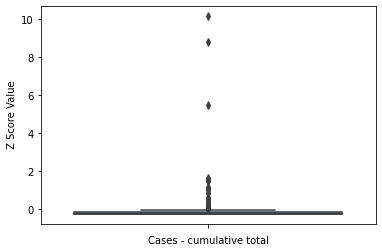

In [7]:
ax=sns.boxplot(y=stats.zscore(x))
ax.set(xlabel='Cases - cumulative total',ylabel=' Z Score Value')

#### Scatter Plot with Outliers

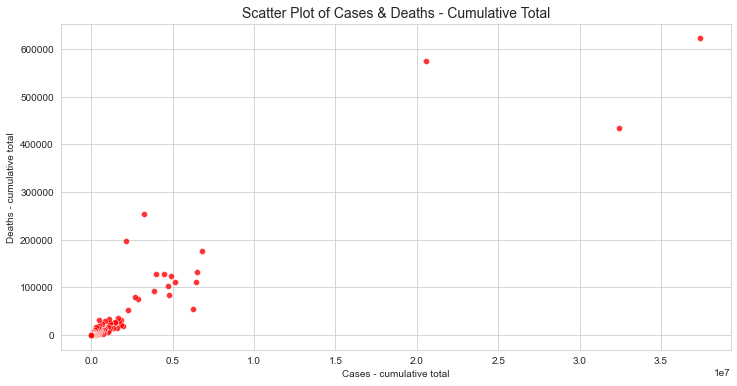

In [8]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.scatterplot(data=df,x=df['Cases - cumulative total'],y=df['Deaths - cumulative total'],color='r',alpha=0.8)
plt.title('Scatter Plot of Cases & Deaths - Cumulative Total',size=14);


### 3.3 Working with Outliers: Correcting, Removing

#### Create Clean Data Frame with loc & iloc function 

In [9]:
# Delect 0 value - No statistical Significant
df1=df.loc[df['Cases - cumulative total'] >0]
# Delelect Outliers ( absolute of z-score greater than 3)
z = stats.zscore(df1['Cases - cumulative total'])
clean_df =df1.iloc[(z<3) & (z>-3)]
clean_df.tail(5)

,Name,WHO Region,Cases - cumulative total,Deaths - cumulative total
219,Saba,Americas,10,0
220,Marshall Islands,Western Pacific,4,0
221,Vanuatu,Western Pacific,3,0
222,Palau,Western Pacific,2,0
223,Samoa,Western Pacific,1,0


### 4.Hypothesis Test for Regression Model 
#### 4.1 Finding Parameters and Correlation between (x,y) of Clean Data


In [10]:
clean_df.describe()

,Cases - cumulative total,Deaths - cumulative total
count,2.210000e+02,221.000000
mean,5.489544e+05,12666.393665
std,1.220781e+06,33575.363527
min,1.000000e+00,0.000000
25%,8.955000e+03,103.000000
50%,7.995900e+04,1053.000000
75%,4.082450e+05,7214.000000
max,6.766541e+06,252927.000000


In [11]:
clean_x=clean_df['Cases - cumulative total']
clean_y=clean_df['Deaths - cumulative total']

stats.linregress(clean_x,clean_y)

LinregressResult(slope=0.02315981717824699, intercept=-47.28889295770023, rvalue=0.842077431854981, pvalue=1.2187662332084403e-60, stderr=0.0010023908208546095)

### Step 4: Data Visualization with Scatter Plot 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


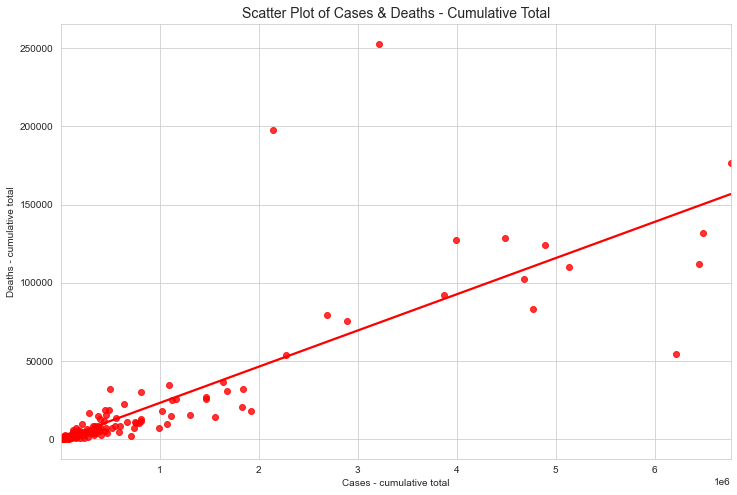

In [12]:
clean_x=clean_df['Cases - cumulative total']
clean_y=clean_df['Deaths - cumulative total']

plt.figure(figsize=(12,8))
#sns.scatterplot(clean_x,clean_y,data=clean_df,color='r')
sns.regplot(clean_x,clean_y,data=clean_df,color='r',ci=None,fit_reg=True)
plt.title('Scatter Plot of Cases & Deaths - Cumulative Total',size=14);

In [13]:
#stats.ttest_ind(clean_x,clean_y,axis=0)